In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* Focus is to understand the final data structure
* support each step by visual analytics

git clone/pull https://github.com/CSSEGISandData/COVID-19.git

In [2]:
data_path = '../data/raw/COVID-19/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179242,179267,179321,179328,179477,179597,179624,179674,179716,179716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275574,275615,275621,275688,275732,275732,275732,275838,275864,275881
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265816,265818,265823,265828,265834,265841,265847,265851,265854,265855
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42156,42156,42572,42572,42572,42572,42572,42572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [4]:
time_idx  = pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
5/19/22    25998085
5/20/22    26040460
5/21/22    26044283
5/22/22    26045528
5/23/22    26109965
Length: 853, dtype: int64

In [8]:
country_list = ['Italy','US','Spain','Germany','Korea, South']

In [9]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

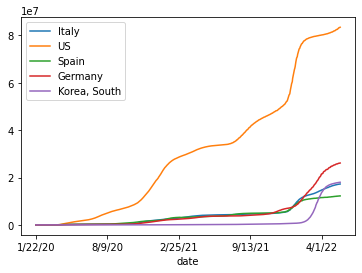

In [10]:
df_plot.set_index('date').plot()

### Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date] #Converting to datetime object
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # Convert back to date ISO norm (str)

In [13]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index = False)

## Relational Data Model
using Primary Key 

In [16]:
data_path = '../data/raw/COVID-19/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179242,179267,179321,179328,179477,179597,179624,179674,179716,179716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275574,275615,275621,275688,275732,275732,275732,275838,275864,275881
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265816,265818,265823,265828,265834,265841,265847,265851,265854,265855
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42156,42156,42572,42572,42572,42572,42572,42572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [17]:
pd_data_base= pd_raw.rename(columns = {'Country/Region':'country', 'Province/State':'state'})

In [18]:
pd_data_base = pd_data_base.drop(['Lat','Long'], axis = 1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179242,179267,179321,179328,179477,179597,179624,179674,179716,179716
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275574,275615,275621,275688,275732,275732,275732,275838,275864,275881
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265816,265818,265823,265828,265834,265841,265847,265851,265854,265855
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42156,42156,42156,42156,42572,42572,42572,42572,42572,42572
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [19]:
test_pd = pd_data_base.set_index(['state','country']).T
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [20]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
243100,5/23/22,Western Australia,Australia,672008.0
243101,5/23/22,Xinjiang,China,1008.0
243102,5/23/22,Yukon,Canada,4349.0
243103,5/23/22,Yunnan,China,2136.0


In [21]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [22]:

pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [23]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [24]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [25]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index = False)